In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics

In [2]:
df = pd.read_csv('insurance-with outliers.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0.0,yes,southwest,16884.92400
1,18,male,33.77,1.0,no,southeast,1725.55230
2,28,male,33.00,3.0,no,southeast,4449.46200
3,33,male,NaN,0.0,no,northwest,21984.47061
4,32,male,28.88,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.97,3.0,NaN,northwest,10600.54830
1334,18,female,31.92,0.0,no,northeast,2205.98080
1335,18,female,36.85,0.0,no,southeast,1629.83350
1336,21,female,25.80,0.0,no,southwest,2007.94500


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0.0,yes,southwest,16884.92400
1,18,male,33.77,1.0,no,southeast,1725.55230
2,28,male,33.00,3.0,no,southeast,4449.46200
3,33,male,NaN,0.0,no,northwest,21984.47061
4,32,male,28.88,0.0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3.0,NaN,northwest,10600.5483
1334,18,female,31.92,0.0,no,northeast,2205.9808
1335,18,female,36.85,0.0,no,southeast,1629.8335
1336,21,female,25.80,0.0,no,southwest,2007.9450
1337,61,female,29.07,0.0,NaN,northwest,29141.3603


In [5]:
df.shape

(1338, 7)

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children    float64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1333 non-null   float64
 3   children  1334 non-null   float64
 4   smoker    1335 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1333.000000,1334.000000,1337.000000
mean,39.269058,30.678920,1.092954,13272.271993
std,14.222380,6.101716,1.204665,12114.353491
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4738.268200
50%,39.000000,30.400000,1.000000,9377.904700
75%,51.000000,34.700000,2.000000,16657.717450
max,120.000000,53.130000,5.000000,63770.428010


In [9]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,True,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [10]:
df.isnull().any()

age         False
sex         False
bmi          True
children     True
smoker       True
region      False
charges      True
dtype: bool

In [11]:
df.isnull().sum()

age         0
sex         0
bmi         5
children    4
smoker      3
region      0
charges     1
dtype: int64

In [12]:
df.isnull().sum().sum()

13

# Impute a categorical missing value

In [13]:
imputer= SimpleImputer(strategy='most_frequent')
df[['smoker']] = imputer.fit_transform(df[['smoker']])
df[['smoker']].isnull().sum()

smoker    0
dtype: int64

# Impute a numerical missing value

In [14]:
imputer_num = SimpleImputer(strategy='mean')
df['bmi'] = imputer_num.fit_transform(df[['bmi']])
df['children'] = imputer_num.fit_transform(df[['children']])
df['charges'] = imputer_num.fit_transform(df[['charges']])
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Identify a scaling problem visually

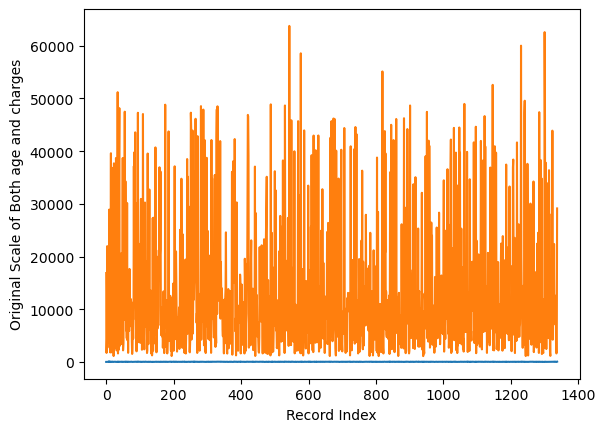

In [15]:
plt.plot(df.age)
plt.plot(df.charges)
plt.xlabel('Record Index')
plt.ylabel('Original Scale of Both age and charges')
plt.show()

# Apply 2 methods of scaling to treat outliers

In [16]:
ss= StandardScaler()
df['age'] = ss.fit_transform(df[['age']])
df['charges'] = ss.fit_transform(df[['charges']])
print(df['age'])
print(df['charges'])

0      -1.425685
1      -1.496023
2      -0.792643
3      -0.440953
4      -0.511291
          ...   
1333    0.754793
1334   -1.496023
1335   -1.496023
1336   -1.285009
1337    1.528511
Name: age, Length: 1338, dtype: float64
0       0.298436
1      -0.953857
2      -0.728839
3       0.719701
4      -0.776967
          ...   
1333   -0.220707
1334   -0.914169
1335   -0.961764
1336   -0.930529
1337    1.310921
Name: charges, Length: 1338, dtype: float64


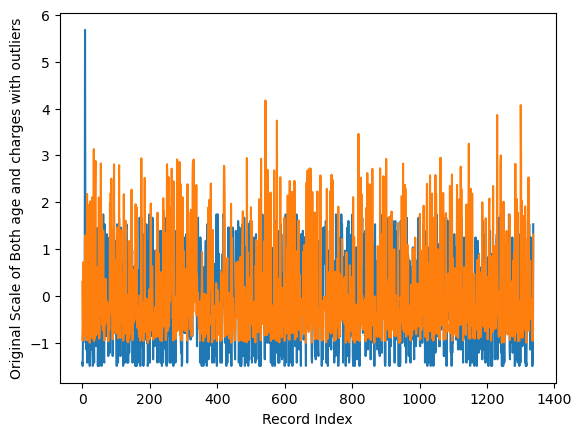

In [17]:
plt.plot(df.age)
plt.plot(df.charges)
plt.xlabel('Record Index')
plt.ylabel('Original Scale of Both age and charges with outliers')
plt.show()

In [18]:
rs = RobustScaler()
df['age'] = rs.fit_transform(df[['age']])
df['charges'] = rs.fit_transform(df[['charges']])
print(df['age'])
print(df['charges'])

0      -0.833333
1      -0.875000
2      -0.458333
3      -0.250000
4      -0.291667
          ...   
1333    0.458333
1334   -0.875000
1335   -0.875000
1336   -0.750000
1337    0.916667
Name: age, Length: 1338, dtype: float64
0       0.630515
1      -0.643422
2      -0.414515
3       1.059062
4      -0.463475
          ...   
1333    0.102399
1334   -0.603049
1335   -0.651466
1336   -0.619691
1337    1.660500
Name: charges, Length: 1338, dtype: float64


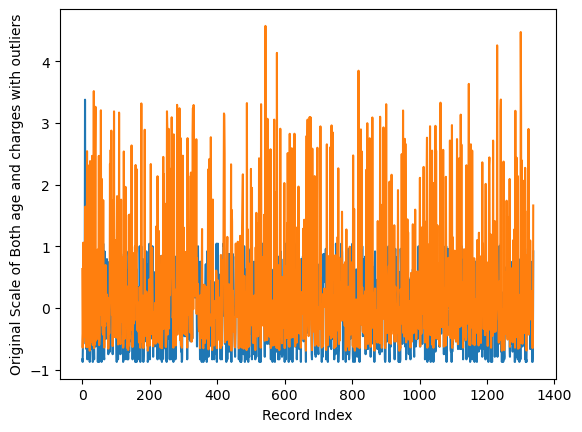

In [19]:
plt.plot(df.age)
plt.plot(df.charges)
plt.xlabel('Record Index')
plt.ylabel('Original Scale of Both age and charges with outliers')
plt.show()

# Convert a categorical variable to number

In [20]:
df['sex'].replace({"male":"1","female":"0"} ,inplace=True)
df['smoker'].replace({"yes":"1","no":"0"} ,inplace=True)
df['region'].replace({"southeast":"0","southwest":"1","northeast":"2","northwest":"3"} ,inplace=True)
df


,age,sex,bmi,children,smoker,region,charges
0,-0.833333,0,27.90000,0.0,1,1,0.630515
1,-0.875000,1,33.77000,1.0,0,0,-0.643422
2,-0.458333,1,33.00000,3.0,0,0,-0.414515
3,-0.250000,1,30.67892,0.0,0,3,1.059062
4,-0.291667,1,28.88000,0.0,0,3,-0.463475
...,...,...,...,...,...,...,...
1333,0.458333,1,30.97000,3.0,0,3,0.102399
1334,-0.875000,0,31.92000,0.0,0,2,-0.603049
1335,-0.875000,0,36.85000,0.0,0,0,-0.651466
1336,-0.750000,0,25.80000,0.0,0,1,-0.619691


# Generate 2 regression models with MAE and R2

In [21]:
correlation=df.corr()

<Axes: >

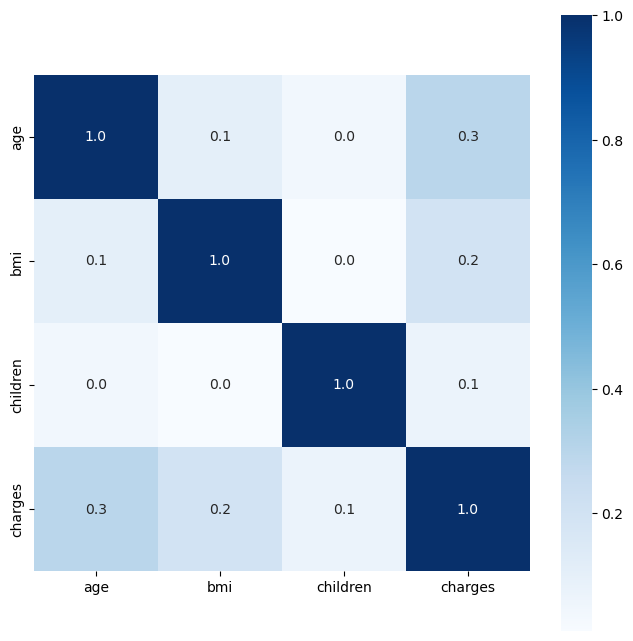

In [22]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':10},cmap='Blues')

In [23]:
print(correlation['charges'])
df

age         0.293051
bmi         0.198009
children    0.070339
charges     1.000000
Name: charges, dtype: float64


,age,sex,bmi,children,smoker,region,charges
0,-0.833333,0,27.90000,0.0,1,1,0.630515
1,-0.875000,1,33.77000,1.0,0,0,-0.643422
2,-0.458333,1,33.00000,3.0,0,0,-0.414515
3,-0.250000,1,30.67892,0.0,0,3,1.059062
4,-0.291667,1,28.88000,0.0,0,3,-0.463475
...,...,...,...,...,...,...,...
1333,0.458333,1,30.97000,3.0,0,3,0.102399
1334,-0.875000,0,31.92000,0.0,0,2,-0.603049
1335,-0.875000,0,36.85000,0.0,0,0,-0.651466
1336,-0.750000,0,25.80000,0.0,0,1,-0.619691


# Splitting tha data

In [27]:
#x=df.drop(['sex','bmi','children','smoker','region','charges'],axis=1)
x=df.drop(['charges'],axis=1)
y=df['charges']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=2)
X_train

,age,sex,bmi,children,smoker,region
882,-0.750000,0,22.135,0.0,0,2
505,-0.083333,1,30.875,3.0,0,3
798,0.791667,0,33.100,0.0,0,1
792,-0.708333,0,23.180,0.0,0,2
201,0.375000,0,32.230,1.0,0,0
...,...,...,...,...,...,...
466,0.875000,0,28.700,1.0,0,1
299,0.375000,0,28.880,1.0,0,3
493,0.916667,1,43.400,0.0,0,1
527,0.500000,0,25.800,1.0,0,1


# RandomForest algo

In [28]:
regressor=RandomForestRegressor(n_estimators=100)
regressor.fit(X_train,Y_train) 
pred=regressor.predict(X_test)
pred

array([-5.17488094e-01,  2.58309792e-01,  4.72660564e-01, -6.02387015e-01,
       -5.75774272e-03, -7.71538753e-02, -5.15314761e-01, -5.40934714e-01,
        8.87543416e-01, -1.57232985e-01,  2.64628663e-01,  9.54554959e-02,
        7.51426927e-01, -6.67601326e-01,  8.86749955e-02,  3.68768284e-01,
       -4.08655893e-01, -2.13051090e-01,  8.62280258e-01, -3.99309663e-01,
        2.81209932e-01, -5.53329748e-01,  2.52764876e+00,  9.81894918e-01,
        2.38161982e+00,  1.48616685e-01, -3.49951526e-01, -1.26380284e-02,
       -2.98038409e-01, -5.02056799e-01, -1.29272087e-01,  7.69609369e-02,
       -7.51568868e-02, -4.20916721e-01,  5.38719616e-02,  1.05099977e-01,
        2.44253230e+00, -3.50304931e-01,  7.39771837e-01,  3.84943933e-01,
       -5.95470442e-01,  2.18158183e+00, -3.86544277e-02, -6.22264480e-01,
       -8.19370715e-02, -2.57707085e-01,  8.43931313e-02, -4.45942732e-02,
       -2.67718381e-01,  1.47958462e-01, -2.08456076e-01, -6.80062143e-01,
        6.84857106e-01,  

# Visualization

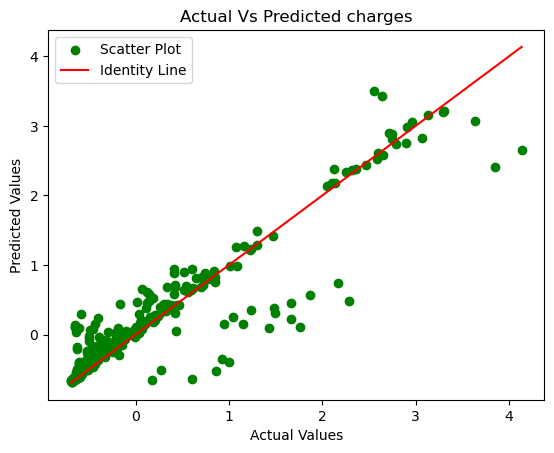

In [30]:
plt.scatter(Y_test, pred, color='green', label='Scatter Plot')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='-', color='red', label='Identity Line')
plt.title('Actual Vs Predicted charges')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Evaluating the Model

In [33]:
error_score=metrics.r2_score(Y_test,pred)
print(" R2 error:",error_score)

 R2 error: 0.8352936560223154


In [35]:
MAE = mean_absolute_error(Y_test, pred)
RMSE = np.sqrt(MAE)
print("Mean Absolute Error (MAE):", MAE)
print("Root Mean Squared Error (RMSE):", RMSE)

Mean Absolute Error (MAE): 0.23084644715146543
Root Mean Squared Error (RMSE): 0.4804648240521521


# Linear Regression Algo

In [37]:
regressor=LinearRegression()
regressor.fit(X_train,Y_train) 
pred=regressor.predict(X_test)
pred

array([-0.65709412,  0.17224566,  0.04502539, -0.58895337, -0.13772027,
        0.14938133, -0.4863267 , -0.7169318 ,  0.21865588,  0.02125602,
        0.17587024, -0.35747717,  1.7258784 , -0.81260679,  0.25086233,
        0.30581088, -0.32077078, -0.11769521,  1.68357248, -0.57432898,
        0.24964607, -0.58694518,  2.11014671,  1.87934078,  1.77217584,
       -0.05122783, -0.61990137,  0.49174637, -0.22666268, -0.60594672,
        0.01371368, -0.29151652, -0.41310114, -0.36777132,  0.00865399,
       -0.38174153,  1.74580631, -0.22066723,  1.50741812,  0.36765771,
       -0.7514083 ,  1.60859744, -0.13119663, -0.65312656,  0.07735742,
       -0.10891197,  0.17575795, -0.09355451,  0.12557112,  0.35887541,
       -0.29476083, -0.84552556,  1.44113923,  2.32315318, -0.1711017 ,
        0.71024877, -0.66707607,  0.13666229, -0.59591171,  2.07312358,
        0.16381805, -0.71023017, -0.43956074,  2.22852781, -0.87101564,
        0.36887252,  0.44329105, -0.48737616,  0.28201688,  0.15

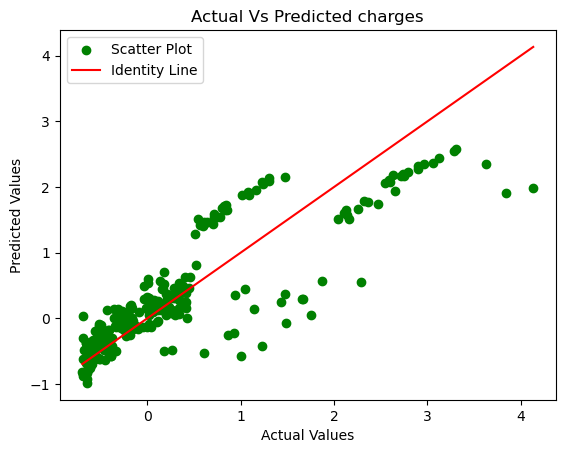

In [38]:
plt.scatter(Y_test, pred, color='green', label='Scatter Plot')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='-', color='red', label='Identity Line')
plt.title('Actual Vs Predicted charges')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Evaluating the Model

In [39]:
error_score=metrics.r2_score(Y_test,pred)
print(" R2 error:",error_score)

 R2 error: 0.7388095082516362


In [40]:
MAE = mean_absolute_error(Y_test, pred)
RMSE = np.sqrt(MAE)
print("Mean Absolute Error (MAE):", MAE)
print("Root Mean Squared Error (RMSE):", RMSE)

Mean Absolute Error (MAE): 0.3629850534873725
Root Mean Squared Error (RMSE): 0.6024824092762978
